#***PROJECT BASED INTERNSHIP RAKAMIN X HOME CREDIT***

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report

### Train Data

In [ ]:
train = pd.read_csv('/content/application_train.csv')

In [ ]:
train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
train.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64
AMT_REQ_CREDIT_BUREAU_WEEK,float64
AMT_REQ_CREDIT_BUREAU_MON,float64
AMT_REQ_CREDIT_BUREAU_QRT,float64


In [ ]:
train.shape

(307511, 122)

In [ ]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Data Cleaning

In [ ]:
train.duplicated().sum()

np.int64(0)

In [ ]:
pd.options.display.max_columns = None  # Menampilkan semua kolom
pd.options.display.max_rows = None  # Menampilkan semua baris

print(train.isnull().sum())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [ ]:
missing_percent = (train.isnull().sum() / len(train)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

COMMONAREA_MEDI                 69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_AVG                  69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56

***Check fitur penting dengan korelasi***

In [ ]:
# Korelasi numerik dengan TARGET
correlation = train.corr(numeric_only=True)['TARGET'].sort_values(key=abs, ascending=False)

# Tampilkan sebagai DataFrame
correlation_df = correlation.reset_index()
correlation_df.columns = ['Feature', 'Correlation with TARGET']
print(correlation_df)

                          Feature  Correlation with TARGET
0                          TARGET                 1.000000
1                    EXT_SOURCE_3                -0.178919
2                    EXT_SOURCE_2                -0.160472
3                    EXT_SOURCE_1                -0.155317
4                      DAYS_BIRTH                 0.078239
5     REGION_RATING_CLIENT_W_CITY                 0.060893
6            REGION_RATING_CLIENT                 0.058899
7          DAYS_LAST_PHONE_CHANGE                 0.055218
8                 DAYS_ID_PUBLISH                 0.051457
9          REG_CITY_NOT_WORK_CITY                 0.050994
10                 FLAG_EMP_PHONE                 0.045982
11                  DAYS_EMPLOYED                -0.044932
12         REG_CITY_NOT_LIVE_CITY                 0.044395
13                FLAG_DOCUMENT_3                 0.044346
14                  FLOORSMAX_AVG                -0.044003
15                 FLOORSMAX_MEDI                -0.0437

***Drop fitur yang kurang penting***

In [ ]:
train.drop(['SK_ID_CURR','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
               'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
               'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
               'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
               'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_CONT_MOBILE',
               'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                'NONLIVINGAPARTMENTS_MODE', 'LIVE_REGION_NOT_WORK_REGION'], axis=1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 91 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        307511 non-null  int64  
 1   NAME_CONTRACT_TYPE            307511 non-null  object 
 2   CODE_GENDER                   307511 non-null  object 
 3   FLAG_OWN_CAR                  307511 non-null  object 
 4   FLAG_OWN_REALTY               307511 non-null  object 
 5   CNT_CHILDREN                  307511 non-null  int64  
 6   AMT_INCOME_TOTAL              307511 non-null  float64
 7   AMT_CREDIT                    307511 non-null  float64
 8   AMT_ANNUITY                   307499 non-null  float64
 9   AMT_GOODS_PRICE               307233 non-null  float64
 10  NAME_TYPE_SUITE               306219 non-null  object 
 11  NAME_INCOME_TYPE              307511 non-null  object 
 12  NAME_EDUCATION_TYPE           307511 non-nul

***Check Outlier***

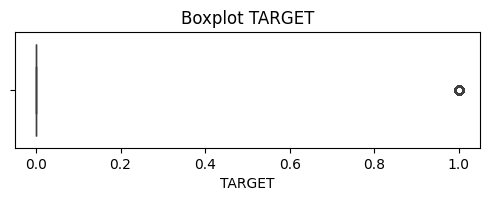

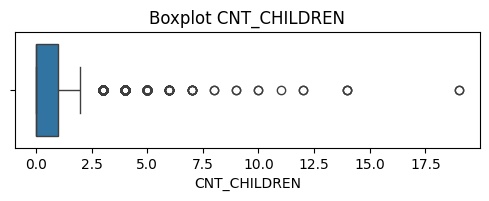

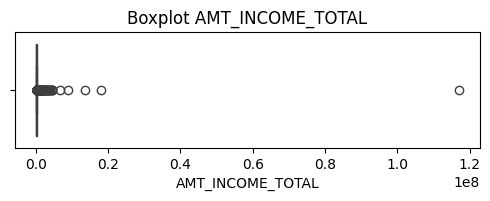

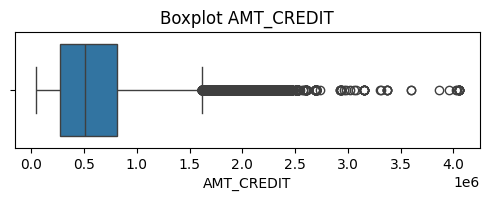

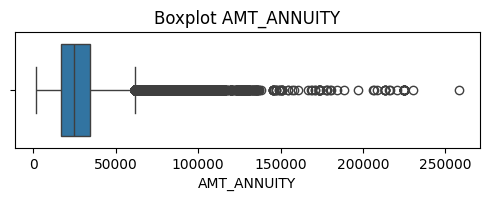

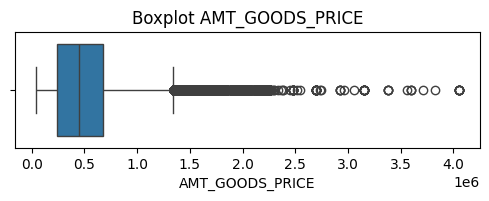

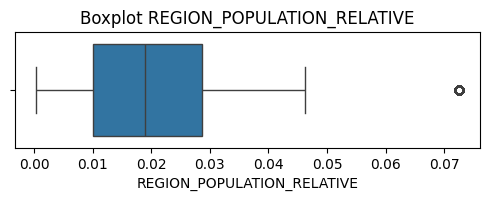

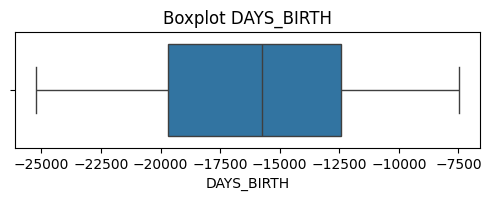

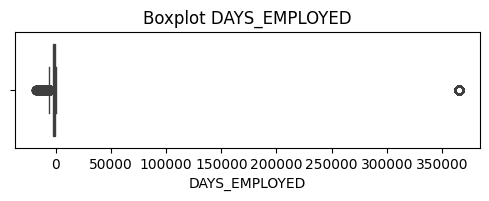

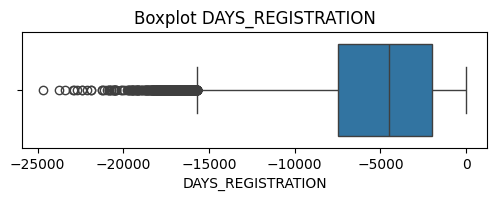

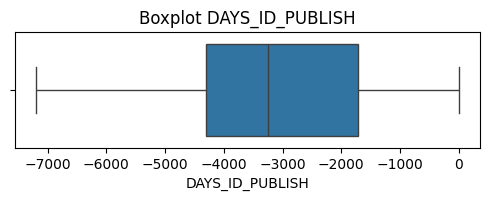

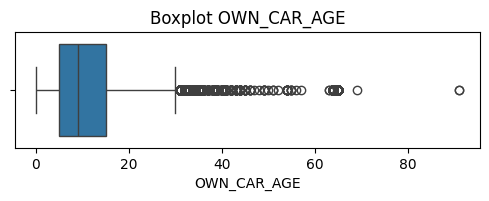

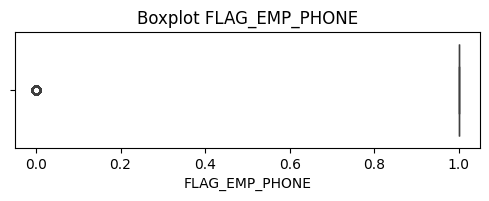

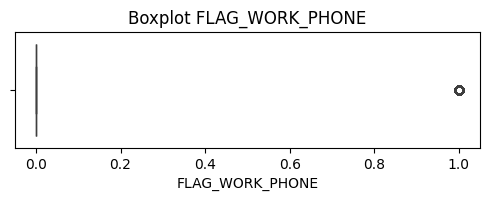

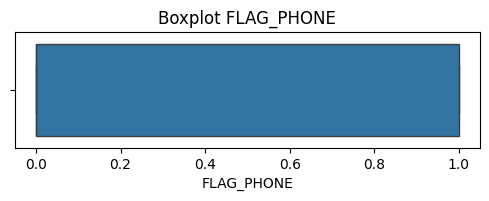

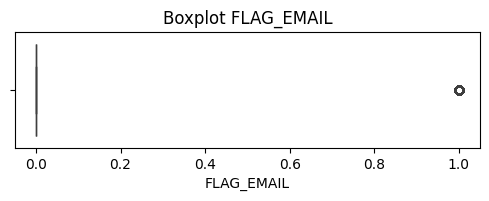

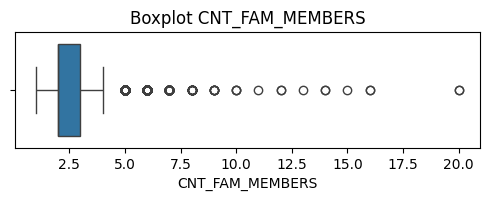

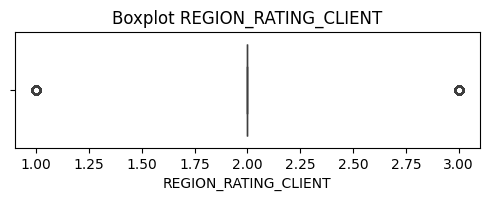

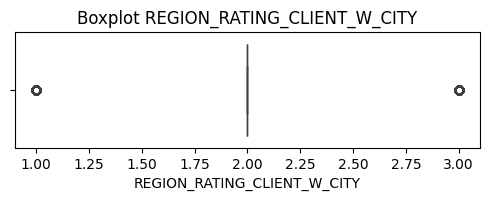

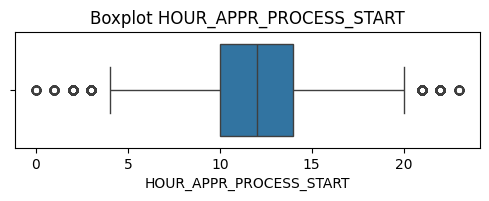

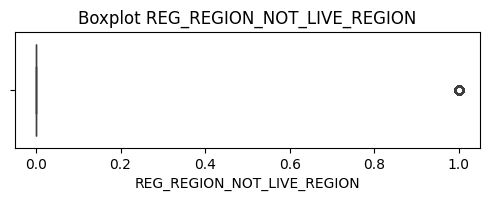

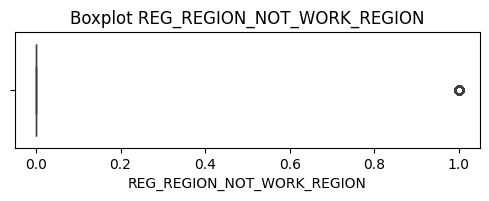

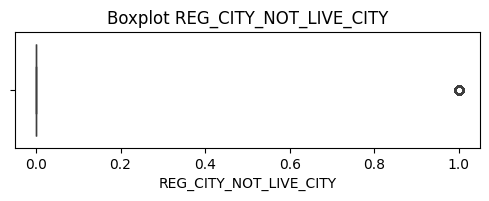

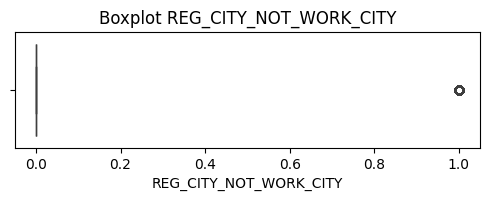

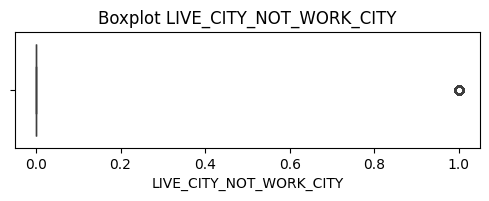

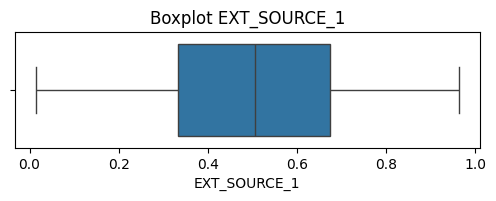

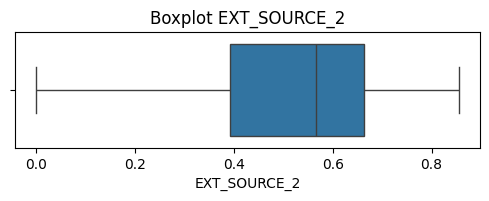

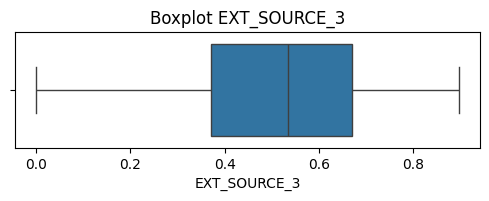

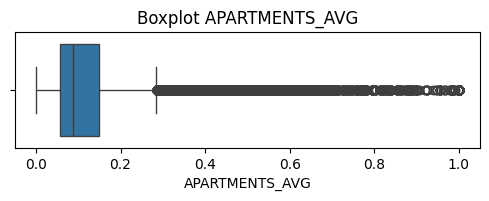

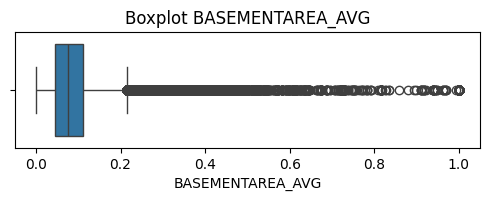

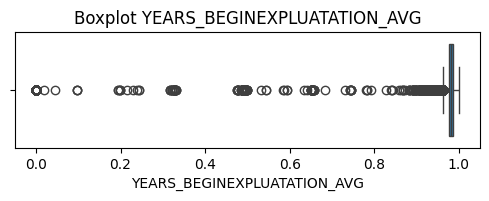

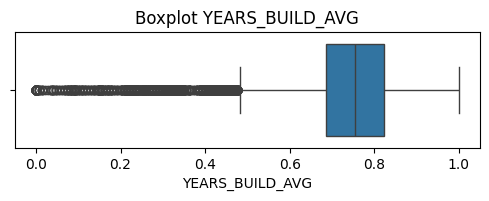

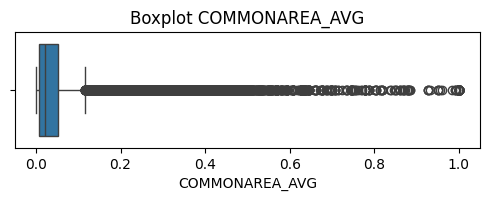

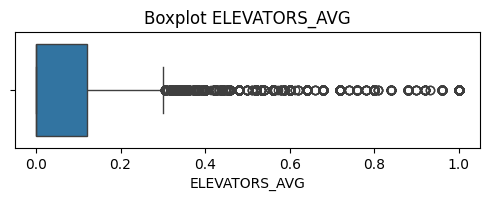

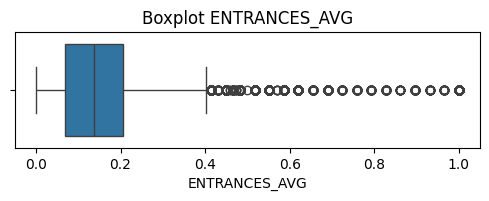

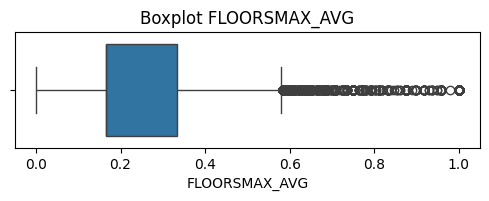

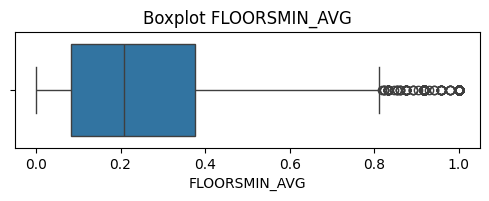

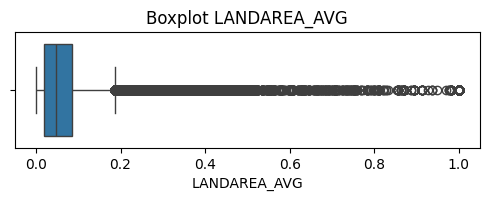

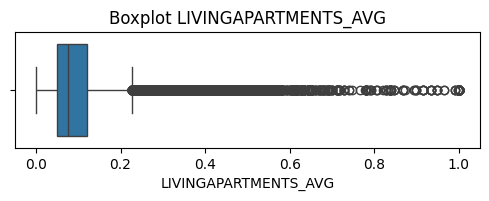

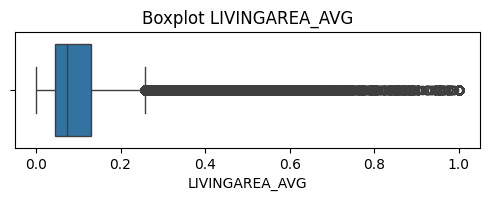

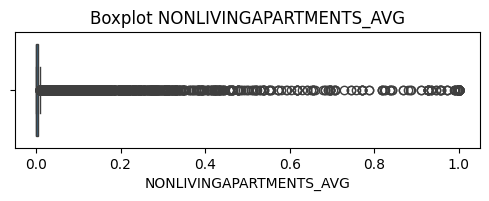

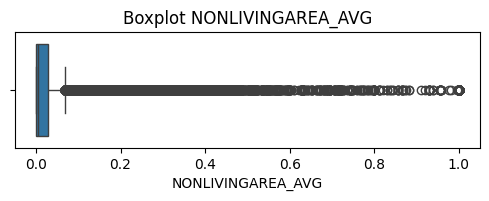

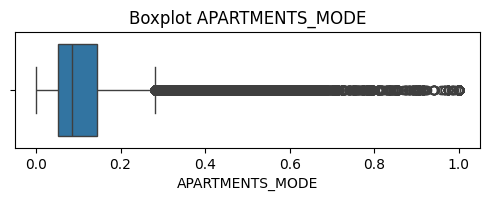

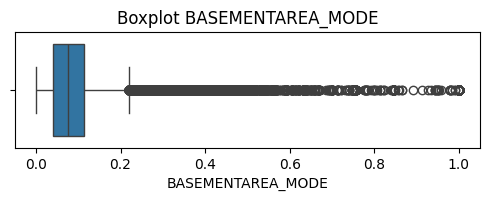

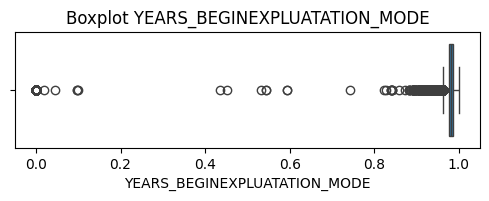

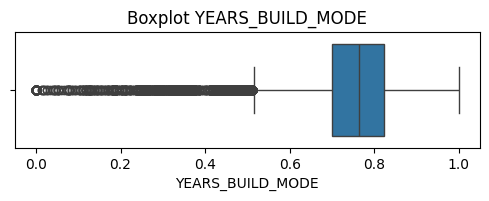

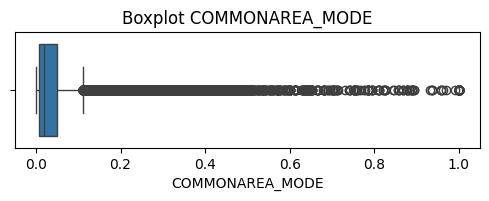

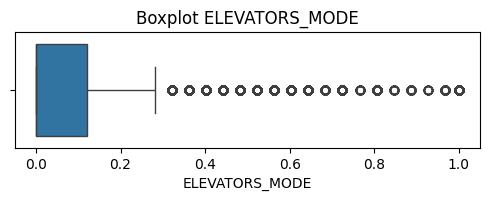

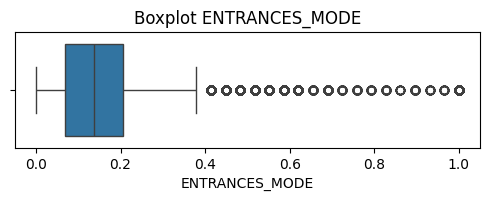

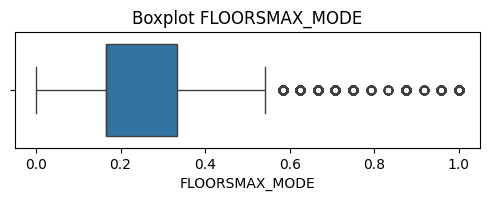

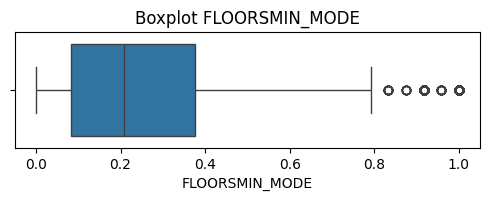

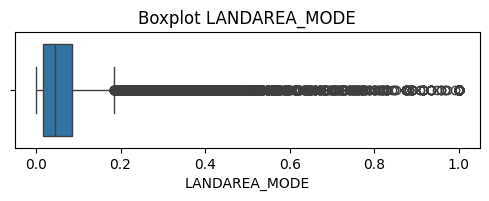

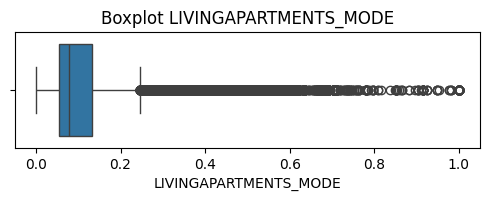

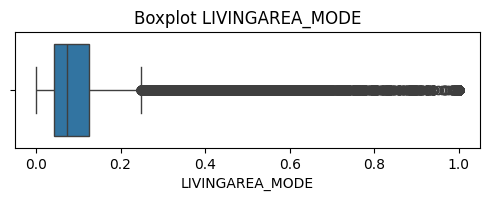

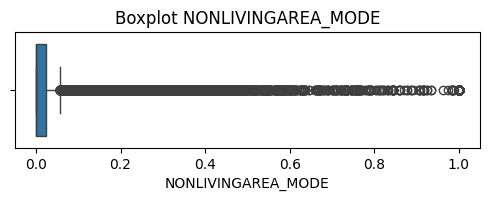

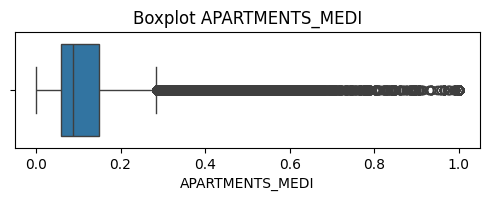

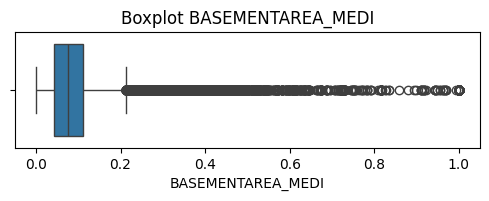

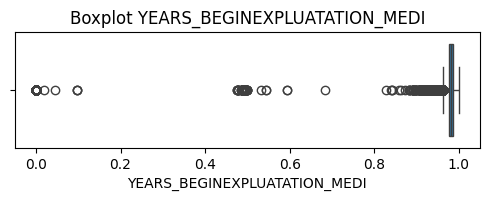

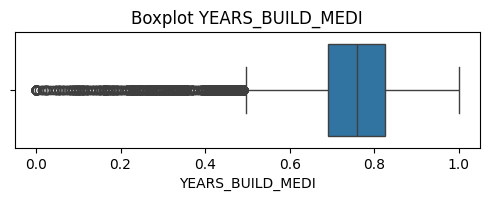

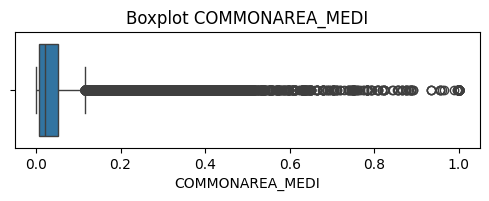

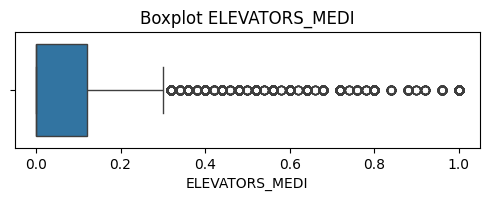

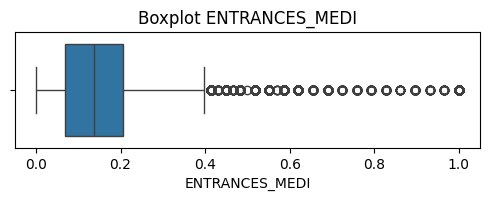

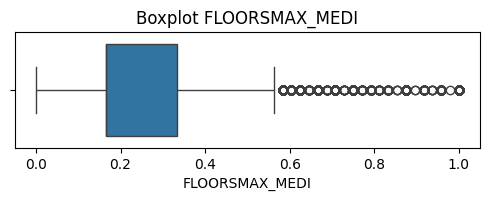

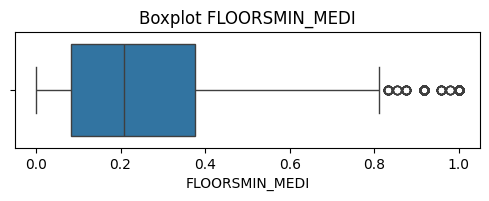

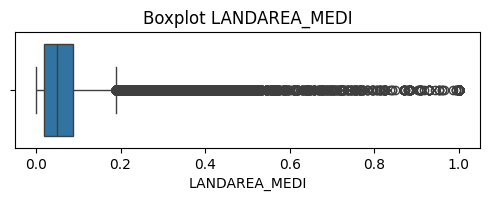

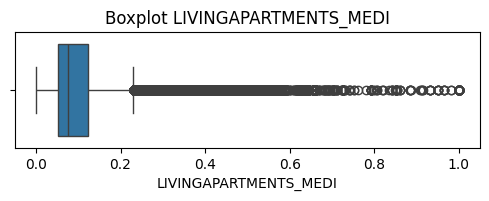

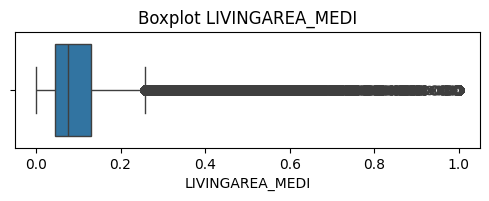

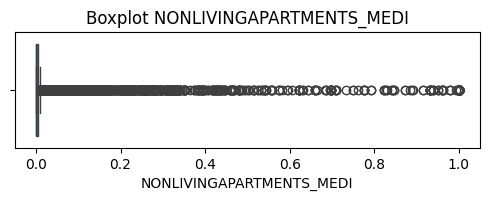

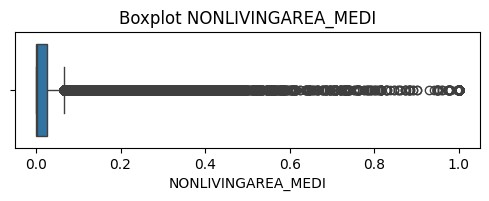

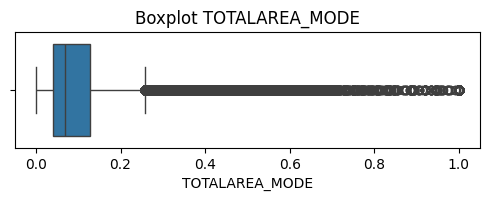

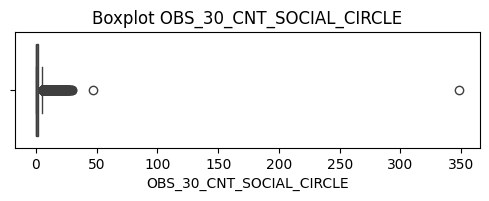

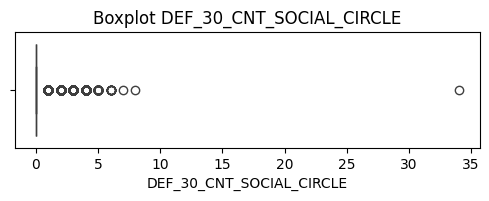

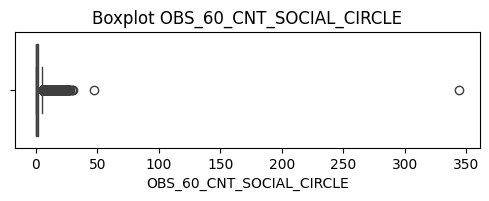

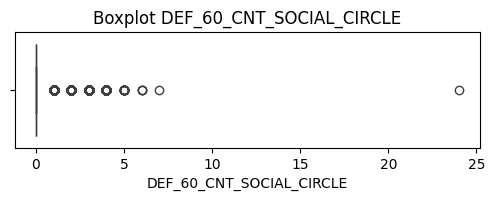

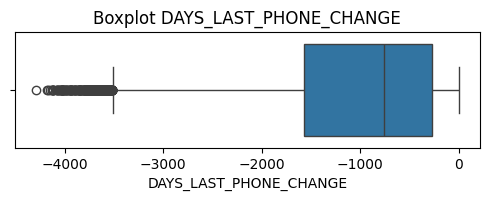

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom dengan tipe data numerik (float64 dan int64)
num_cols = train.select_dtypes(include=['float64', 'int64']).columns

# Menampilkan boxplot untuk setiap kolom numerik
for col in num_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=train[col])
    plt.title(f"Boxplot {col}")
    plt.show()


***Handling Missing Value***

In [ ]:
train.fillna(train.select_dtypes(include=['float64','int64']).median(), inplace=True)
train.isnull().sum()

,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0
AMT_GOODS_PRICE,0


In [ ]:
train[train.select_dtypes(include=['object']).columns] = train.select_dtypes(include=['object']).apply(lambda x: x.fillna(x.mode()[0]))
train.isnull().sum()

,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0
AMT_GOODS_PRICE,0


###***Exploratory Data Analysis***

<ipython-input-17-0d01f024d37a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=train, palette=['Blue', 'Red'])


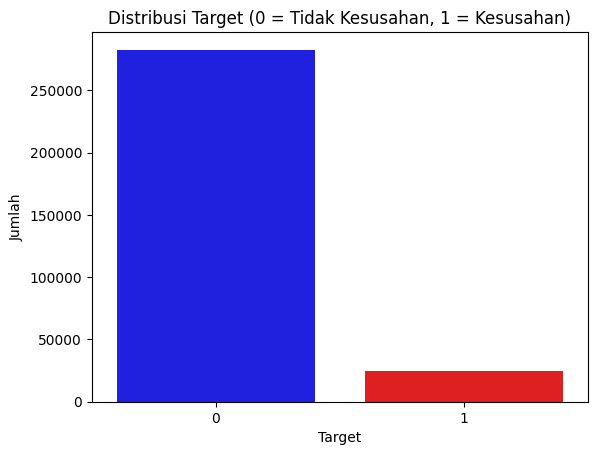

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [ ]:
# Visualisasi distribusi TARGET
sns.countplot(x='TARGET', data=train, palette=['Blue', 'Red'])
plt.title('Distribusi Target (0 = Tidak Kesusahan, 1 = Kesusahan)')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.show()

# Menampilkan persentase
print(train['TARGET'].value_counts(normalize=True) * 100)


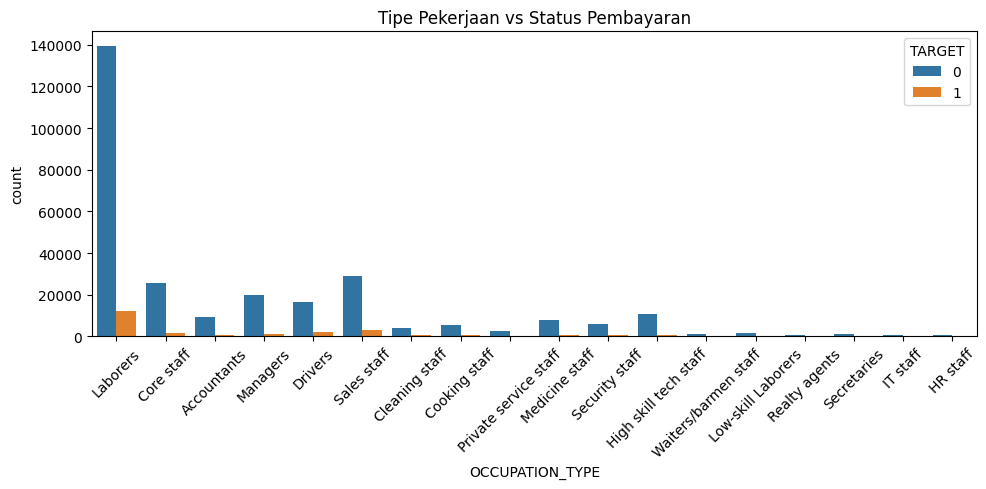

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='OCCUPATION_TYPE', hue='TARGET')
plt.title('Tipe Pekerjaan vs Status Pembayaran')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

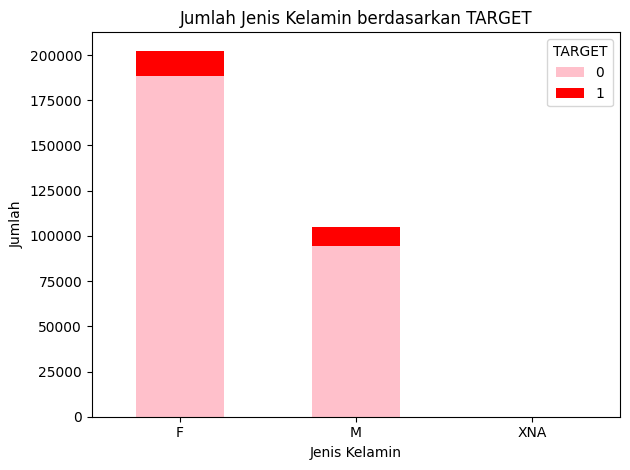

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


In [ ]:
# Jumlah data berdasarkan jenis kelamin dan TARGET
gender_counts = train.groupby(['CODE_GENDER', 'TARGET']).size().unstack()

# Visualisasi
gender_counts.plot(kind='bar', stacked=True, color=['pink', 'red'])
plt.title('Jumlah Jenis Kelamin berdasarkan TARGET')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='TARGET', labels=['0', '1'])
plt.tight_layout()
plt.show()

print(train['CODE_GENDER'].value_counts())


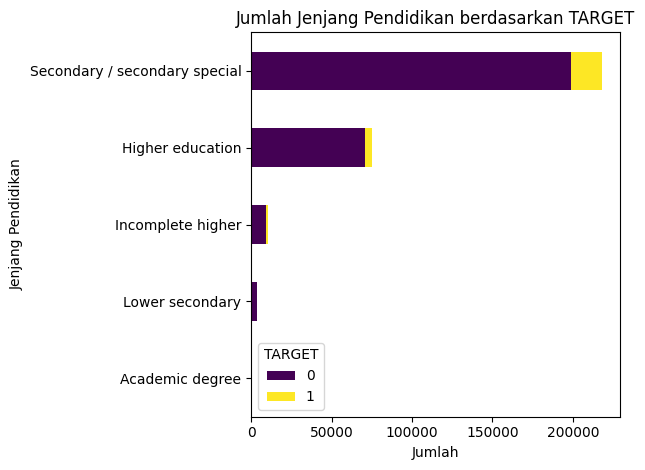

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64


In [ ]:
# Hitung jumlah per jenjang pendidikan dan TARGET
edu_counts = train.groupby(['NAME_EDUCATION_TYPE', 'TARGET']).size().unstack()

# Urutkan berdasarkan total jumlah (dari besar ke kecil)
edu_counts = edu_counts.sort_values(by=0, ascending= True)

# Visualisasi
edu_counts.plot(kind='barh', stacked=True, colormap='viridis')
plt.title('Jumlah Jenjang Pendidikan berdasarkan TARGET')
plt.xlabel('Jumlah')
plt.ylabel('Jenjang Pendidikan')
plt.legend(title='TARGET', labels=['0', '1'])
plt.tight_layout()
plt.show()

# Tampilkan jumlah total tiap kategori pendidikan
print(train['NAME_EDUCATION_TYPE'].value_counts())


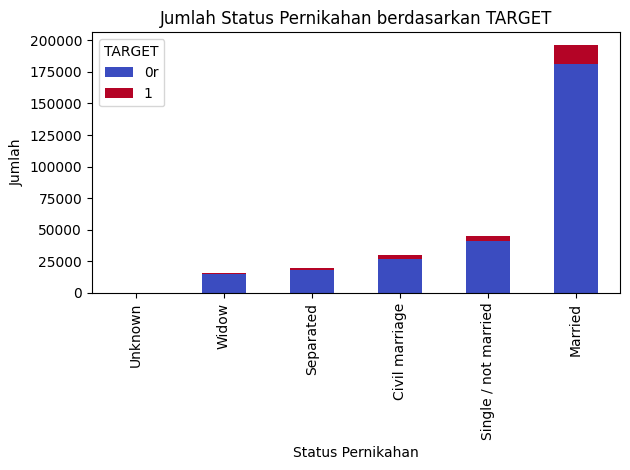

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64


In [ ]:
fam_counts = train.groupby(['NAME_FAMILY_STATUS', 'TARGET']).size().unstack()

# Urutkan berdasarkan total jumlah (dari kecil ke besar)
fam_counts = fam_counts.sort_values(by=0, ascending= True)

fam_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Jumlah Status Pernikahan berdasarkan TARGET')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah')
plt.legend(title='TARGET', labels=['0r', '1'])
plt.tight_layout()
plt.show()

print(train['NAME_FAMILY_STATUS'].value_counts())


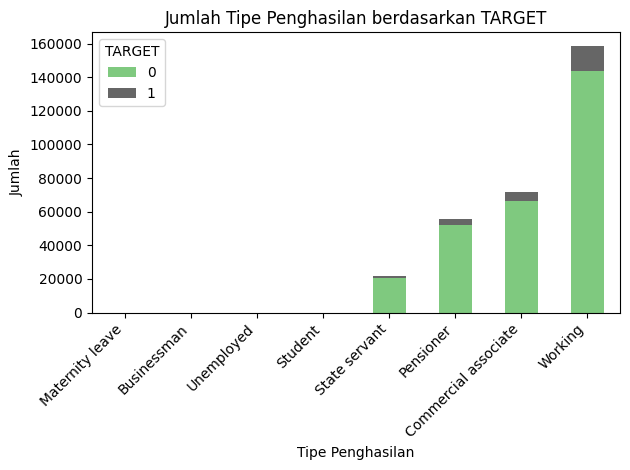

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


In [ ]:
# Hitung jumlah per tipe penghasilan dan TARGET
inc_counts = train.groupby(['NAME_INCOME_TYPE', 'TARGET']).size().unstack()

# Urutkan berdasarkan total jumlah 'TARGET' = 0 (atau bisa juga berdasarkan total semua TARGET)
inc_counts = inc_counts.sort_values(by=0, ascending=True)

# Visualisasi bar vertikal
inc_counts.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Jumlah Tipe Penghasilan berdasarkan TARGET')
plt.ylabel('Jumlah')
plt.xlabel('Tipe Penghasilan')
plt.xticks(rotation=45, ha='right')
plt.legend(title='TARGET', labels=['0', '1'])
plt.tight_layout()
plt.show()

# Tampilkan jumlah total tiap tipe penghasilan
print(train['NAME_INCOME_TYPE'].value_counts())


## Label Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Kolom untuk Label Encoding (kolom biner dan ordinal)
label_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
                 'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET']

label_encoder = LabelEncoder()

# Apply Label Encoding
for col in label_columns:
    train[col] = label_encoder.fit_transform(train[col])

In [ ]:
# Kolom untuk One-Hot Encoding (kolom nominal)
one_hot_columns = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                   'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
                   'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
                   'EMERGENCYSTATE_MODE']

# Apply One-Hot Encoding
train = pd.get_dummies(train, columns=one_hot_columns, drop_first=True)  # drop_first=True untuk menghindari dummy variable trap
train.head()


,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_Revolving loans,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZAT

## Modelling

In [ ]:
X = train.drop('TARGET', axis=1)  # Fitur (input) tanpa kolom TARGET
y = train['TARGET']  # Target (label)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek ukuran dataset setelah splitting
print(f'Ukuran data training: {X_train.shape[0]} baris')
print(f'Ukuran data testing: {X_test.shape[0]} baris')

Ukuran data training: 246008 baris
Ukuran data testing: 61503 baris


In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform data latih
X_train = scaler.fit_transform(X_train)

# Transform data uji dengan scaler yang sama
X_test = scaler.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Membuat model Logistic Regression
model_LR = LogisticRegression(random_state=42, class_weight='balanced')
model_LR.fit(X_train_resampled,  y_train_resampled)

y_prob_LR = model_LR.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1
threshold = 0.4
model_Pred_LR = (y_prob_LR >= threshold).astype(int)

# Memprediksi data uji
model_Pred_LR = model_LR.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, model_Pred_LR)
report_LR = classification_report(y_test, model_Pred_LR)
roc_auc = roc_auc_score(y_test, y_prob_LR)

# Evaluasi
print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, model_Pred_LR))

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report_LR)
print(f'ROC AUC Score: {roc_auc:.4f}')


Logistic Regression - Confusion Matrix:
[[39376 17178]
 [ 1731  3218]]
Accuracy: 0.6926
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.70      0.81     56554
           1       0.16      0.65      0.25      4949

    accuracy                           0.69     61503
   macro avg       0.56      0.67      0.53     61503
weighted avg       0.89      0.69      0.76     61503

ROC AUC Score: 0.7358


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Inisialisasi dan latih model dengan class_weight seimbang
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_resampled, y_train_resampled)

# Prediksi probabilitas untuk kelas 1
y_prob = rf.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred = (y_prob >= threshold).astype(int)

# Evaluasi
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Output
print(f'Accuracy: {acc:.4f}')
print('Classification Report:\n', report)
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.9094
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56554
           1       0.28      0.08      0.12      4949

    accuracy                           0.91     61503
   macro avg       0.60      0.53      0.54     61503
weighted avg       0.87      0.91      0.89     61503

ROC AUC Score: 0.6996


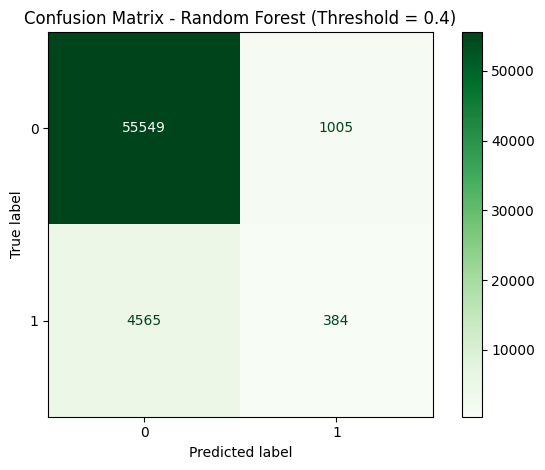

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix - Random Forest (Threshold = 0.4)")
plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Inisialisasi model XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # Hindari warning
)

# Fit model dengan data hasil SMOTE
xgb.fit(X_train_resampled, y_train_resampled)

# Prediksi probabilitas untuk kelas 1
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_xgb = (y_prob_xgb >= threshold).astype(int)

# Evaluasi hasil
acc_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Output
print(f'Accuracy (XGBoost): {acc_xgb:.4f}')
print('Classification Report (XGBoost):\n', report_xgb)
print(f'ROC AUC Score (XGBoost): {roc_auc_xgb:.4f}')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (XGBoost): 0.9109
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56554
           1       0.31      0.09      0.14      4949

    accuracy                           0.91     61503
   macro avg       0.62      0.53      0.54     61503
weighted avg       0.88      0.91      0.89     61503

ROC AUC Score (XGBoost): 0.7217


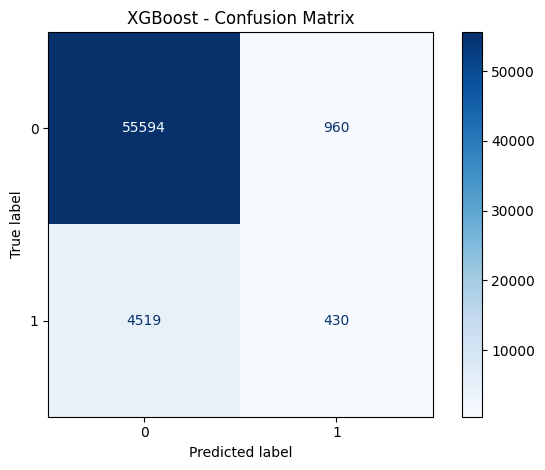

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Buat confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')

# Judul dan layout
plt.title("XGBoost - Confusion Matrix")
plt.tight_layout()
plt.show()

## TEST DATA

In [ ]:
test= pd.read_csv('/content/application_test.csv')

In [ ]:
test.head()

In [ ]:
pd.options.display.max_columns = None  # Menampilkan semua kolom
pd.options.display.max_rows = None  # Menampilkan semua baris

print(test.isnull().sum())

In [ ]:
test.dtypes

In [ ]:
test.describe()

### Data Cleaning

In [ ]:
test.drop(['SK_ID_CURR','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
               'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
               'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
               'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
               'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_CONT_MOBILE',
               'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                'NONLIVINGAPARTMENTS_MODE', 'LIVE_REGION_NOT_WORK_REGION'], axis=1, inplace=True)

***Handling Missing Value***

In [ ]:
test.fillna(test.select_dtypes(include=['float64','int64']).median(), inplace=True)
test.isnull().sum()

In [ ]:
test[test.select_dtypes(include=['object']).columns] = test.select_dtypes(include=['object']).apply(lambda x: x.fillna(x.mode()[0]))
test.isnull().sum()

***Encoding***

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Kolom untuk Label Encoding (kolom biner dan ordinal)
label_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
                 'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET']

label_encoder = LabelEncoder()

# Apply Label Encoding
for col in label_columns:
    test[col] = label_encoder.fit_transform(test[col])

In [ ]:
# Kolom untuk One-Hot Encoding (kolom nominal)
one_hot_columns = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                   'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
                   'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
                   'EMERGENCYSTATE_MODE']

# Apply One-Hot Encoding
test = pd.get_dummies(test, columns=one_hot_columns, drop_first=True)  # drop_first=True untuk menghindari dummy variable trap
test.head()
